Import Lib--

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

load the data --

In [2]:
df = pd.read_csv('../data/health.csv')
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB
None


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fever,2000.0,0.3280,0.469602,0.0,0.0,0.0,1.0,1.0
headache,2000.0,0.4130,0.492496,0.0,0.0,0.0,1.0,1.0
nausea,2000.0,0.3785,0.485134,0.0,0.0,0.0,1.0,1.0
vomiting,2000.0,0.5260,0.499448,0.0,0.0,1.0,1.0,1.0
fatigue,2000.0,0.3655,0.481691,0.0,0.0,0.0,1.0,1.0
joint_pain,2000.0,0.4505,0.497668,0.0,0.0,0.0,1.0,1.0
skin_rash,2000.0,0.3870,0.487185,0.0,0.0,0.0,1.0,1.0
cough,2000.0,0.5550,0.497090,0.0,0.0,1.0,1.0,1.0
weight_loss,2000.0,0.4560,0.498185,0.0,0.0,0.0,1.0,1.0
yellow_eyes,2000.0,0.4490,0.497517,0.0,0.0,0.0,1.0,1.0


In [5]:
df.isnull().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64

In [6]:
df['disease'].value_counts()

disease
Paralysis (brain hemorrhage)                      90
Hepatitis B                                       80
Impetigo                                          80
Hypertension                                      80
Vertigo (Benign paroxysmal Positional Vertigo)    70
Hyperthyroidism                                   70
Tuberculosis                                      70
Cervical spondylosis                              70
Dimorphic hemorrhoids(piles)                      70
Typhoid                                           70
Hepatitis C                                       70
Chronic cholestasis                               70
Malaria                                           60
Gastroenteritis                                   60
Osteoarthritis                                    60
Heart attack                                      60
Arthritis                                         50
Bronchial Asthma                                  50
Hypoglycemia                          

<Axes: xlabel='count', ylabel='disease'>

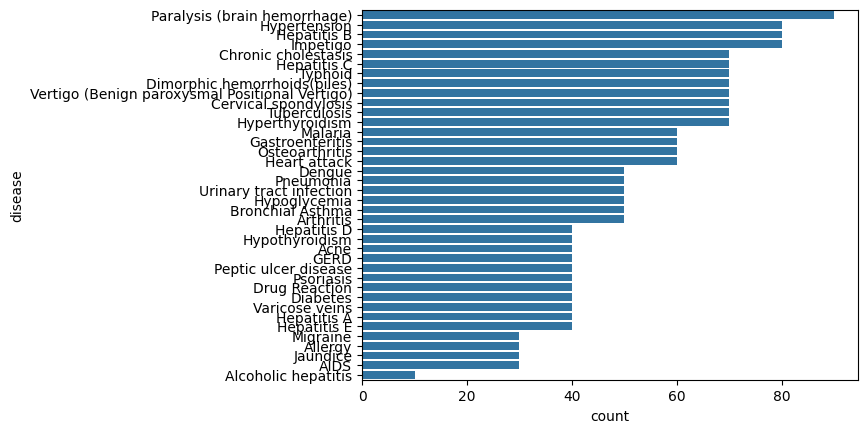

In [7]:
sns.countplot(df['disease'])

Here we can see the data is imbalanced 

In [8]:
# How iloc works

x = df.iloc[:,:-1]
x

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,1,1,0,0
3,0,0,1,1,1,0,1,1,1,1
4,1,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1995,1,1,0,0,1,0,0,0,1,1
1996,1,0,0,0,1,1,1,0,1,1
1997,1,0,0,1,0,0,0,0,0,1
1998,0,0,0,0,1,1,0,0,0,1


In [9]:
y = df.iloc[:,-1]
y

0       Paralysis (brain hemorrhage)
1       Paralysis (brain hemorrhage)
2       Paralysis (brain hemorrhage)
3       Paralysis (brain hemorrhage)
4       Paralysis (brain hemorrhage)
                    ...             
1995             Alcoholic hepatitis
1996             Alcoholic hepatitis
1997             Alcoholic hepatitis
1998             Alcoholic hepatitis
1999             Alcoholic hepatitis
Name: disease, Length: 2000, dtype: object

In [10]:
#let add a new column 

lable = LabelEncoder()
df['disease_lable'] = lable.fit_transform(df['disease'])
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease,disease_lable
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage),29
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage),29
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage),29
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage),29
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage),29


In [11]:
# Let see the correllation
df_new = df.drop('disease',axis=1)
df_new.corr()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease_lable
fever,1.000000,-0.025800,-0.007237,-0.019315,-0.090159,0.005291,-0.041265,-0.090177,0.016816,-0.014012,-0.001362
headache,-0.025800,1.000000,-0.036936,-0.035542,-0.044078,0.061000,0.013214,-0.000879,-0.078815,-0.052825,0.033452
nausea,-0.007237,-0.036936,1.000000,-0.031345,0.056336,-0.095370,-0.048594,0.030836,-0.008677,-0.008069,-0.110131
vomiting,-0.019315,-0.035542,-0.031345,1.000000,0.127868,-0.032053,-0.105106,-0.009793,0.020684,-0.038952,-0.027101
fatigue,-0.090159,-0.044078,0.056336,0.127868,1.000000,-0.132126,-0.053073,0.059114,-0.069493,-0.102741,0.098856
joint_pain,0.005291,0.061000,-0.095370,-0.032053,-0.132126,1.000000,-0.030303,-0.097174,-0.044099,-0.037477,-0.081884
skin_rash,-0.041265,0.013214,-0.048594,-0.105106,-0.053073,-0.030303,1.000000,-0.050753,-0.018435,-0.034108,0.056618
cough,-0.090177,-0.000879,0.030836,-0.009793,0.059114,-0.097174,-0.050753,1.000000,-0.006383,-0.051358,-0.006499
weight_loss,0.016816,-0.078815,-0.008677,0.020684,-0.069493,-0.044099,-0.018435,-0.006383,1.000000,0.019198,-0.021764
yellow_eyes,-0.014012,-0.052825,-0.008069,-0.038952,-0.102741,-0.037477,-0.034108,-0.051358,0.019198,1.000000,-0.124325


<Axes: >

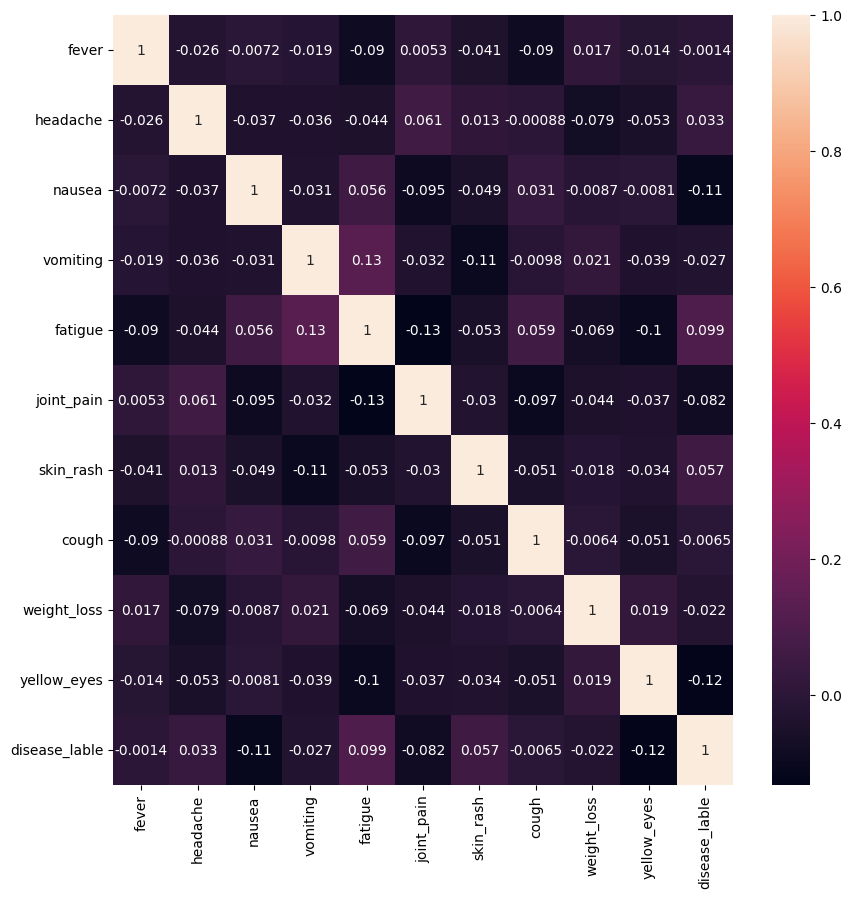

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True)

In [13]:
x = df.iloc[:,:-2]
x.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,1,1,0,0
3,0,0,1,1,1,0,1,1,1,1
4,1,0,1,0,1,0,0,0,1,1


In [14]:
y = df.iloc[:,-1]
y.head()

0    29
1    29
2    29
3    29
4    29
Name: disease_lable, dtype: int64

<Axes: xlabel='disease_lable', ylabel='count'>

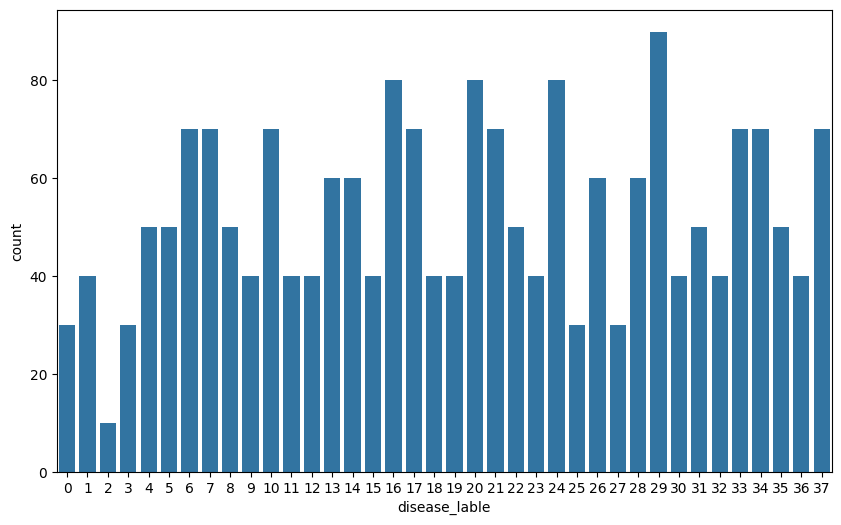

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x=y)

Let use randome over sampleing to balanced the data

In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [21]:
ros = RandomOverSampler(random_state=42)
x_resample, y_resample = ros.fit_resample(x,y)
print(x_resample.shape,y_resample.shape)
print(x_resample.head())
print(y_resample.head())

(3420, 10) (3420,)
   fever  headache  nausea  vomiting  fatigue  joint_pain  skin_rash  cough  \
0      1         0       1         0        1           0          0      1   
1      0         0       1         0        0           0          1      1   
2      0         0       1         0        1           0          1      1   
3      0         0       1         1        1           0          1      1   
4      1         0       1         0        1           0          0      0   

   weight_loss  yellow_eyes  
0            1            0  
1            0            0  
2            0            0  
3            1            1  
4            1            1  
0    29
1    29
2    29
3    29
4    29
Name: disease_lable, dtype: int64


In [26]:
# let do train and test split

x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2736, 10), (684, 10), (2736,), (684,))

Models--

In [35]:
# SVC

svc_model = SVC()
svc_model.fit(x_train,y_train)
svc_predict = svc_model.predict(x_test)
svc_predict[0:10]

array([ 0, 26, 25, 34,  8, 19, 10, 17, 37, 18])

In [36]:
svc_model = SVC()
svc_model.fit(x_resample,y_resample)
svc_predict = svc_model.predict(x_resample)
svc_predict[0:10]

array([29, 10, 29, 34,  6, 29, 22, 29, 34, 32])

In [28]:
cf_matrix_svc = confusion_matrix(svc_predict,y_test)
cf_matrix_svc

array([[15,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  1],
       [ 0,  0, 10, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ...,  6,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  1,  0,  8]], shape=(38, 38))

<Axes: >

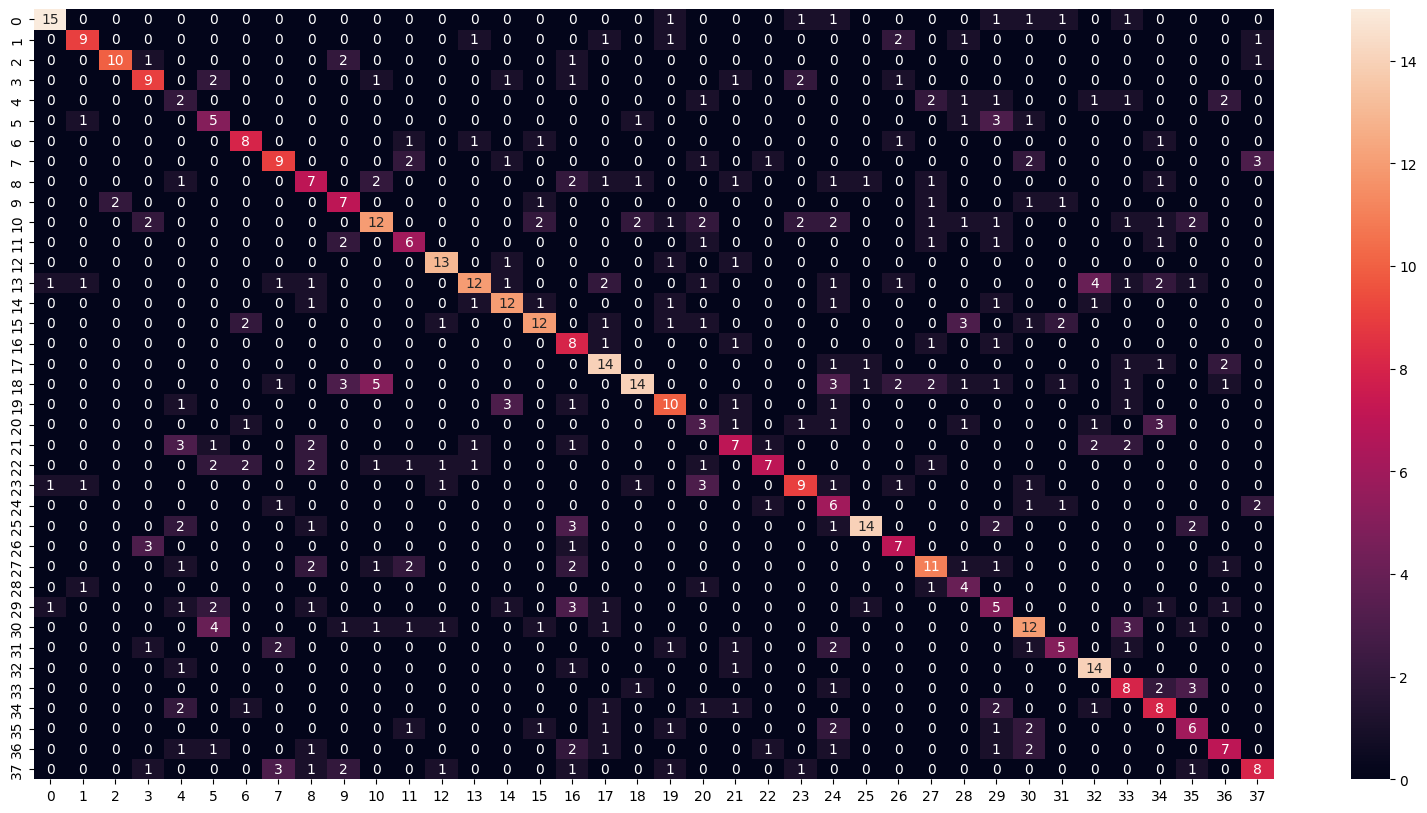

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(cf_matrix_svc,annot=True)

In [31]:
# accuracy

acc = accuracy_score(svc_predict,y_test)
acc

0.489766081871345

In [37]:
acc = accuracy_score(y_resample,svc_predict)
acc

0.6052631578947368

In [34]:
cfr = classification_report(y_test,svc_predict)
print(cfr)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.56      0.69      0.62        13
           2       0.67      0.83      0.74        12
           3       0.50      0.53      0.51        17
           4       0.18      0.13      0.15        15
           5       0.42      0.29      0.34        17
           6       0.62      0.57      0.59        14
           7       0.47      0.53      0.50        17
           8       0.37      0.37      0.37        19
           9       0.54      0.41      0.47        17
          10       0.38      0.52      0.44        23
          11       0.50      0.43      0.46        14
          12       0.81      0.72      0.76        18
          13       0.40      0.71      0.51        17
          14       0.63      0.60      0.62        20
          15       0.50      0.63      0.56        19
          16       0.67      0.30      0.41        27
          17       0.70    

In [38]:
# GNB

gnb_model = GaussianNB()
gnb_model.fit(x_resample,y_resample)
gnb_predict = gnb_model.predict(x_resample)
gnb_predict[0:10]

array([29, 29, 29, 11,  2, 29, 22,  5, 34, 32])

In [39]:
cf = confusion_matrix(y_resample,gnb_predict)
cf

array([[70,  3,  0, ...,  0,  0,  0],
       [ 3, 43,  1, ...,  0,  0,  0],
       [ 0,  0, 90, ...,  0,  0,  0],
       ...,
       [ 0,  0, 17, ..., 47,  0,  0],
       [ 0,  0,  4, ...,  0, 42,  0],
       [ 0,  0, 67, ...,  1,  0,  4]], shape=(38, 38))

<Axes: >

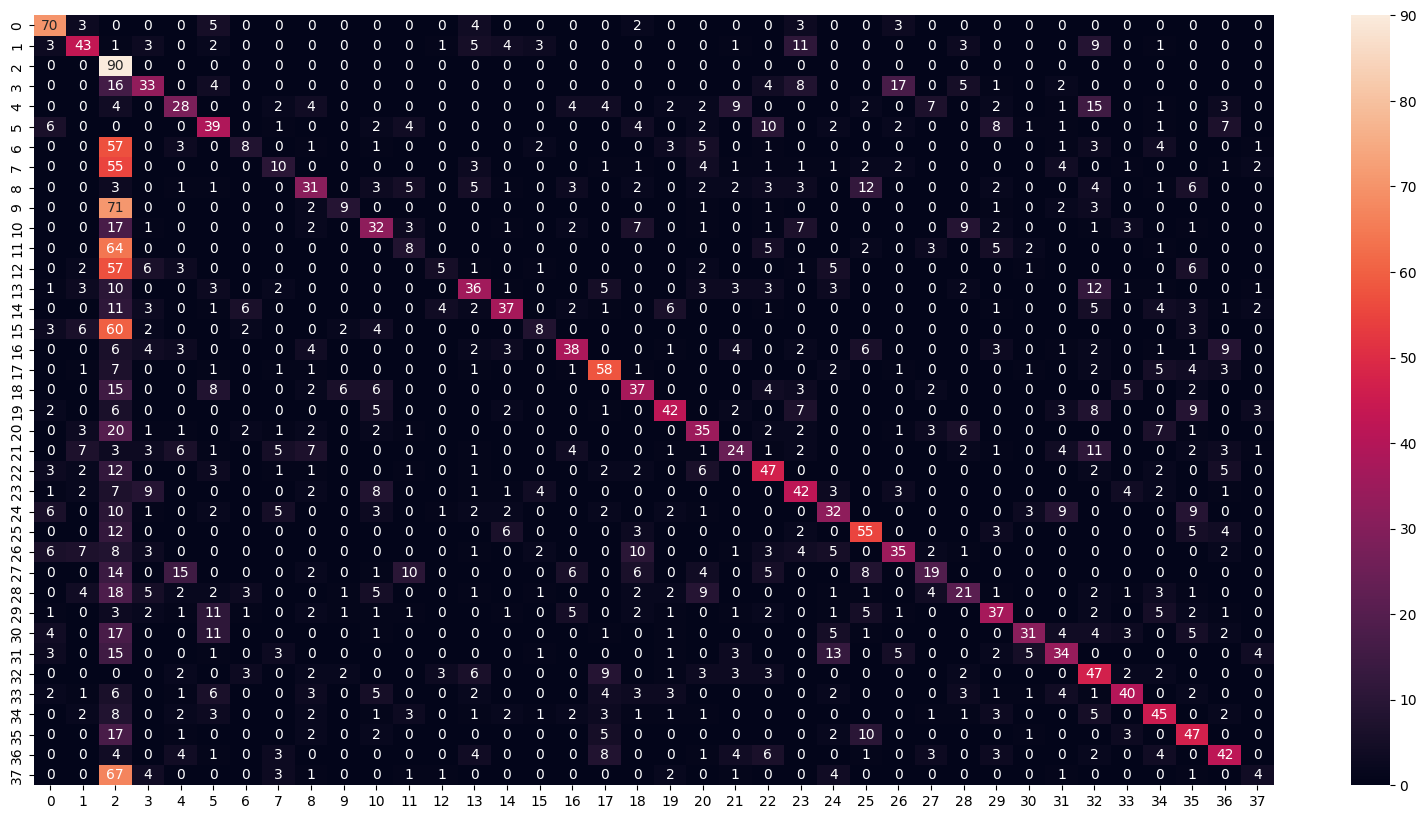

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(cf,annot=True)

In [41]:
acc = accuracy_score(gnb_predict,y_resample)
acc

0.3798245614035088

In [43]:
cfr = classification_report(gnb_predict,y_resample)
print(cfr)

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       111
           1       0.48      0.50      0.49        86
           2       1.00      0.11      0.20       791
           3       0.37      0.41      0.39        80
           4       0.31      0.38      0.34        73
           5       0.43      0.37      0.40       105
           6       0.09      0.32      0.14        25
           7       0.11      0.27      0.16        37
           8       0.34      0.42      0.38        73
           9       0.10      0.43      0.16        21
          10       0.36      0.39      0.37        82
          11       0.09      0.22      0.13        37
          12       0.06      0.33      0.10        15
          13       0.40      0.46      0.43        79
          14       0.41      0.61      0.49        61
          15       0.09      0.35      0.14        23
          16       0.42      0.57      0.48        67
          17       0.64    

In [44]:
# RFC

rfc_model = RandomForestClassifier()
rfc_model.fit(x_resample,y_resample)
rfc_predict = rfc_model.predict(x_resample)
rfc_predict[0:10]

array([29, 10, 29, 34,  6,  8,  5, 29, 34, 32])

In [45]:
cf = confusion_matrix(rfc_predict,y_resample)
cf

array([[79,  0,  0, ...,  0,  0,  0],
       [ 3, 66,  0, ...,  0,  0,  1],
       [ 0,  0, 80, ...,  2,  0,  1],
       ...,
       [ 0,  0,  0, ..., 65,  0,  0],
       [ 0,  0,  0, ...,  0, 66,  0],
       [ 0,  0,  0, ...,  4,  0, 42]], shape=(38, 38))

<Axes: >

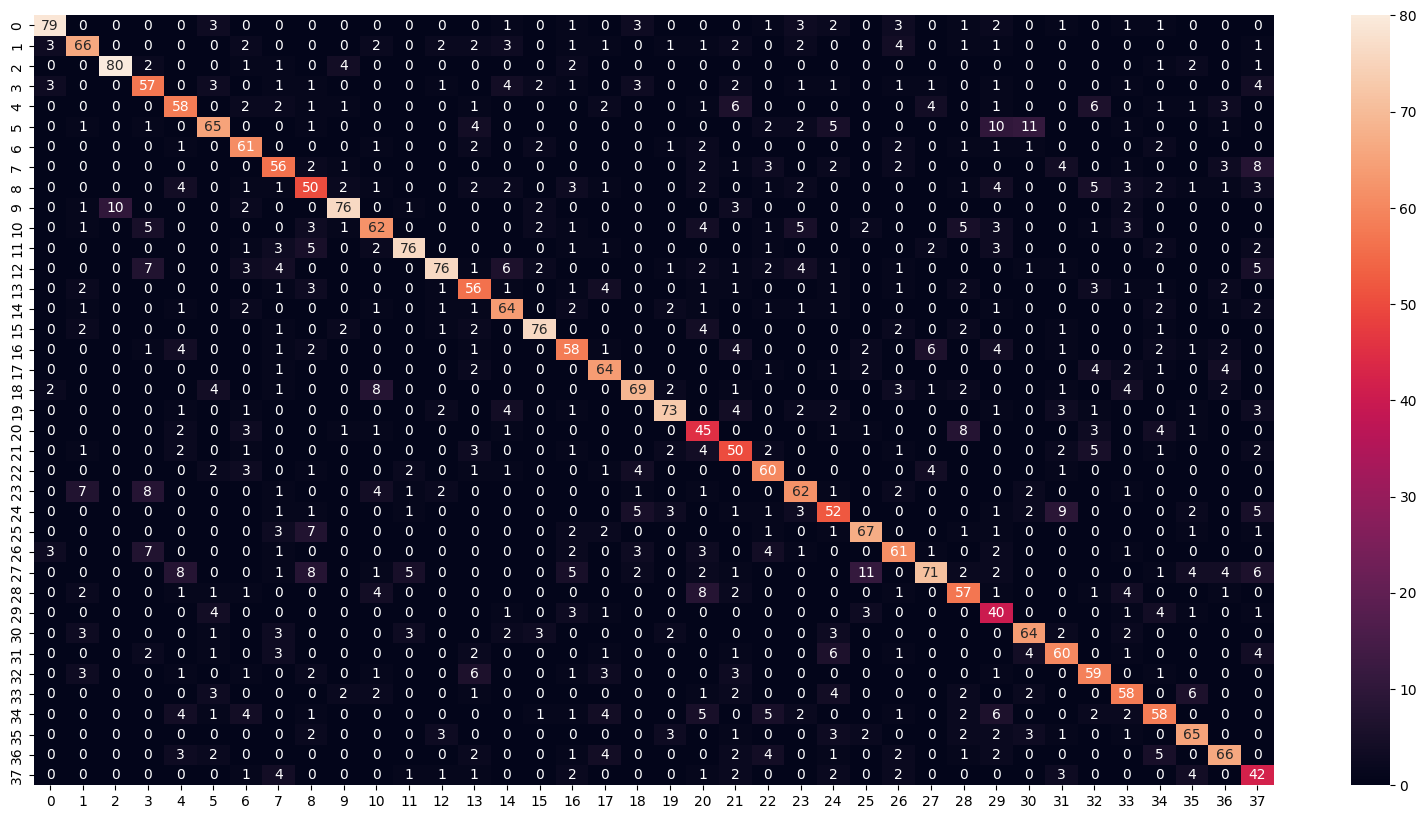

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(cf,annot=True)

In [47]:
acc = accuracy_score(rfc_predict,y_resample)
acc

0.689766081871345

In [49]:
cfr = classification_report(rfc_predict,y_resample)
print(cfr)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.73      0.69      0.71        95
           2       0.89      0.85      0.87        94
           3       0.63      0.65      0.64        88
           4       0.64      0.64      0.64        90
           5       0.72      0.62      0.67       104
           6       0.68      0.79      0.73        77
           7       0.62      0.66      0.64        85
           8       0.56      0.54      0.55        92
           9       0.84      0.78      0.81        97
          10       0.69      0.63      0.66        99
          11       0.84      0.77      0.80        99
          12       0.84      0.64      0.73       118
          13       0.62      0.68      0.65        82
          14       0.71      0.75      0.73        85
          15       0.84      0.81      0.83        94
          16       0.64      0.64      0.64        90
          17       0.71    

<Axes: >

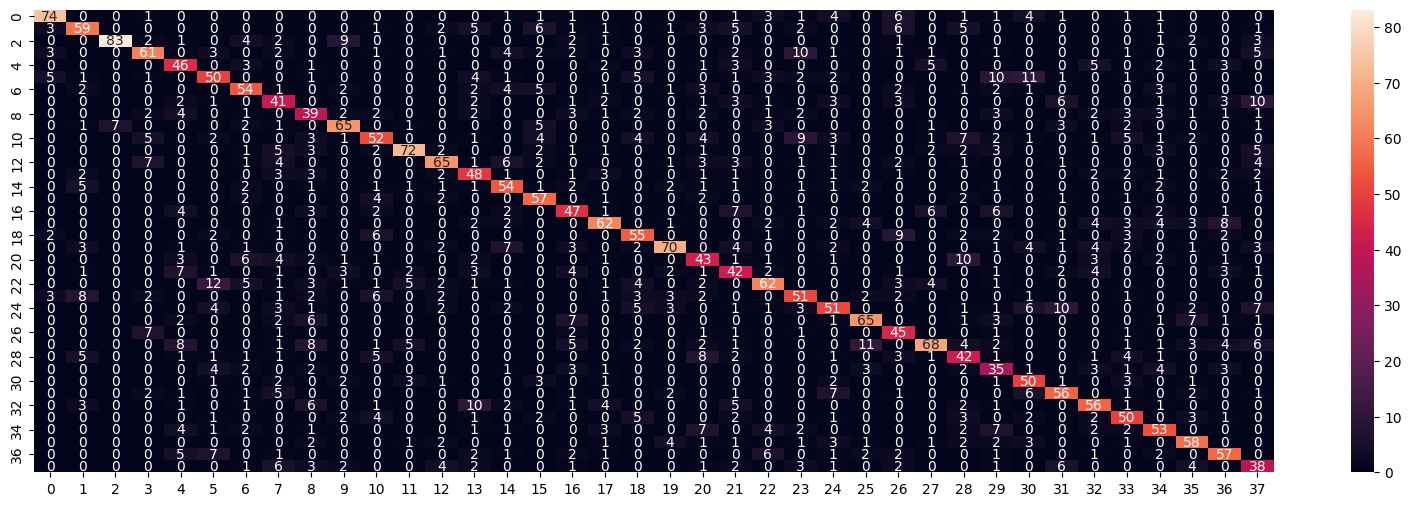

In [50]:
# Combine Prdection

from statistics import mode

final_predict = [mode([i,j,k]) for i, j, k in zip(svc_predict,gnb_predict,rfc_predict)]
cf = confusion_matrix(final_predict,y_resample)
plt.figure(figsize=(20,6))
sns.heatmap(cf,annot=True)

In [51]:
acc = accuracy_score(final_predict,y_resample)
acc

0.6070175438596491

In [52]:
cfr = classification_report(final_predict,y_resample)
print(cfr)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       102
           1       0.66      0.58      0.61       102
           2       0.92      0.75      0.83       111
           3       0.68      0.59      0.63       104
           4       0.51      0.64      0.57        72
           5       0.56      0.51      0.53        99
           6       0.60      0.64      0.62        84
           7       0.46      0.51      0.48        80
           8       0.43      0.51      0.47        77
           9       0.72      0.71      0.71        92
          10       0.58      0.48      0.53       108
          11       0.80      0.68      0.73       106
          12       0.72      0.63      0.67       103
          13       0.53      0.63      0.58        76
          14       0.60      0.67      0.63        81
          15       0.63      0.79      0.70        72
          16       0.52      0.57      0.55        82
          17       0.69    

In [56]:
print(dict(zip(lable.classes_, lable.transform(lable.classes_))))

{'AIDS': np.int64(0), 'Acne': np.int64(1), 'Alcoholic hepatitis': np.int64(2), 'Allergy': np.int64(3), 'Arthritis': np.int64(4), 'Bronchial Asthma': np.int64(5), 'Cervical spondylosis': np.int64(6), 'Chronic cholestasis': np.int64(7), 'Dengue': np.int64(8), 'Diabetes': np.int64(9), 'Dimorphic hemorrhoids(piles)': np.int64(10), 'Drug Reaction': np.int64(11), 'GERD': np.int64(12), 'Gastroenteritis': np.int64(13), 'Heart attack': np.int64(14), 'Hepatitis A': np.int64(15), 'Hepatitis B': np.int64(16), 'Hepatitis C': np.int64(17), 'Hepatitis D': np.int64(18), 'Hepatitis E': np.int64(19), 'Hypertension': np.int64(20), 'Hyperthyroidism': np.int64(21), 'Hypoglycemia': np.int64(22), 'Hypothyroidism': np.int64(23), 'Impetigo': np.int64(24), 'Jaundice': np.int64(25), 'Malaria': np.int64(26), 'Migraine': np.int64(27), 'Osteoarthritis': np.int64(28), 'Paralysis (brain hemorrhage)': np.int64(29), 'Peptic ulcer disease': np.int64(30), 'Pneumonia': np.int64(31), 'Psoriasis': np.int64(32), 'Tuberculosi

In [53]:
# map the symptoms to index

symptoms = x.columns.values
symptoms_index = {symptoms: idx for idx, symptoms in enumerate(symptoms)}

In [54]:
print(symptoms)

['fever' 'headache' 'nausea' 'vomiting' 'fatigue' 'joint_pain' 'skin_rash'
 'cough' 'weight_loss' 'yellow_eyes']


In [55]:
print(symptoms_index)

{'fever': 0, 'headache': 1, 'nausea': 2, 'vomiting': 3, 'fatigue': 4, 'joint_pain': 5, 'skin_rash': 6, 'cough': 7, 'weight_loss': 8, 'yellow_eyes': 9}


In [57]:
def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptoms_index)
    
    for symptom in input_symptoms:
        if symptom in symptoms_index:
            input_data[symptoms_index[symptom]] = 1
    
    input_data = np.array(input_data).reshape(1, -1)

    rf_pred = lable.classes_[rfc_model.predict(input_data)[0]]
    nb_pred = lable.classes_[gnb_model.predict(input_data)[0]]
    svm_pred = lable.classes_[svc_model.predict(input_data)[0]]

    final_pred = mode([rf_pred, nb_pred, svm_pred])
    
    return {
        "Random Forest Prediction": rf_pred,
        "Naive Bayes Prediction": nb_pred,
        "SVM Prediction": svm_pred,
        "Final Prediction": final_pred
    }

In [58]:
print(predict_disease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'Random Forest Prediction': 'Heart attack', 'Naive Bayes Prediction': 'Urinary tract infection', 'SVM Prediction': 'Impetigo', 'Final Prediction': 'Heart attack'}


/Users/mohitrajnayak/Data Sci Work/Data Sci REPO/Machine-Learning/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/mohitrajnayak/Data Sci Work/Data Sci REPO/Machine-Learning/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/mohitrajnayak/Data Sci Work/Data Sci REPO/Machine-Learning/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
